In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Iris_data.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


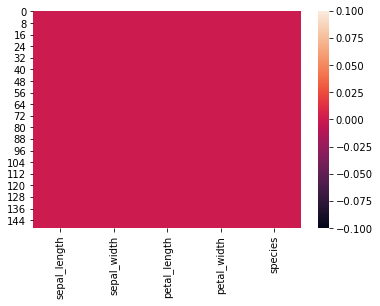

In [4]:
sns.heatmap(df.isnull())

In [5]:
df.shape

(150, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [7]:
df['species'].unique() 

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
df['species']= label_encoder.fit_transform(df['species']) 

In [10]:
df['species'].unique() 

array([0, 1, 2])

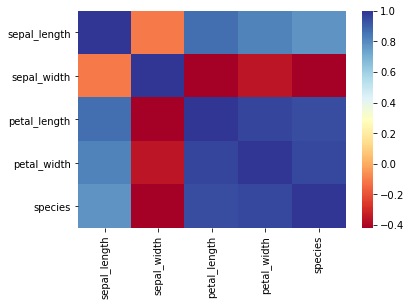

In [11]:
sns.heatmap(df.corr(),cmap='RdYlBu')

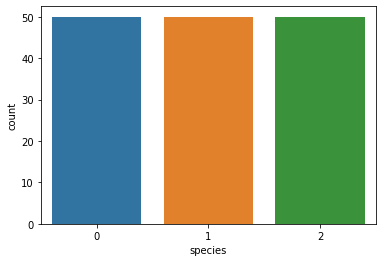

In [12]:
sns.countplot(x="species",data=df)

In [13]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


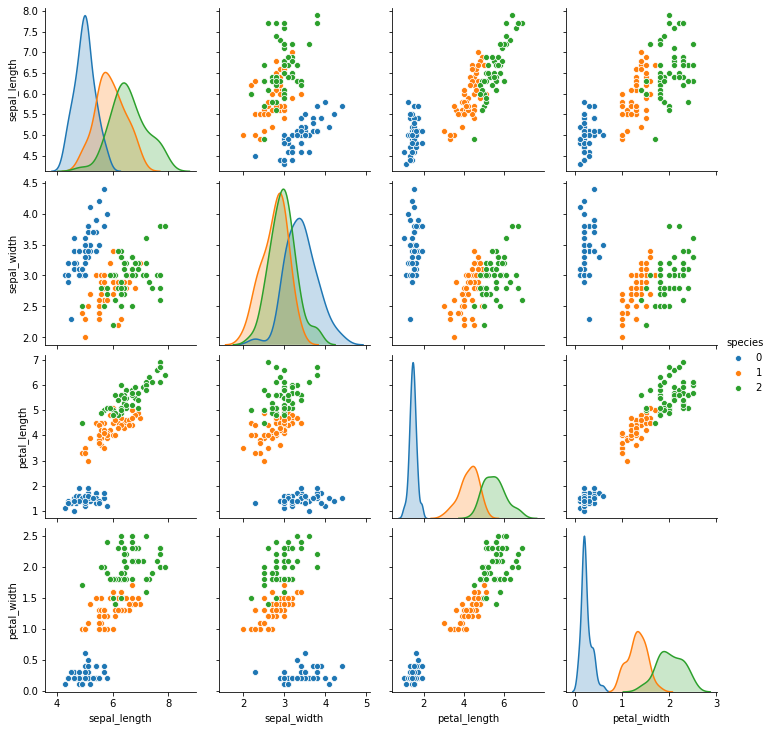

In [14]:
sns.pairplot(df,hue='species')

In [15]:
X=df.iloc[ :, :4]

In [16]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
y=df.iloc[ :, -1:]

In [18]:
y.head()

,species
0,0
1,0
2,0
3,0
4,0


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

logistic regression accuracy score:  1.0


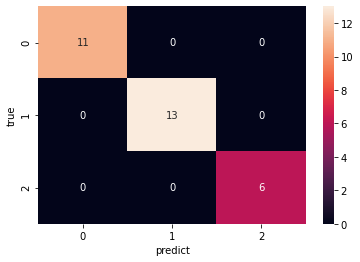

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
lreg = LogisticRegression().fit(X_train,y_train)
lreg_pred = lreg.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix
lreg_cm = confusion_matrix(lreg_pred,y_test)
ax = sns.heatmap(lreg_cm,annot=True)
ax.set(xlabel='predict', ylabel='true')
lreg_as = accuracy_score(lreg_pred,y_test)
print("logistic regression accuracy score: ",lreg_as)

In [22]:
from sklearn.model_selection import cross_val_score
lreg =LogisticRegression() 
print(cross_val_score(lreg,X,y,cv=10,scoring='accuracy').mean())

0.9733333333333334


In [23]:
pd.DataFrame(np.c_[y_test, lreg_pred], columns=["Original","Predicted"])

,Original,Predicted
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0
5,2,2
6,0,0
7,1,1
8,1,1
9,1,1
